Comparing Mean

1. Answer with the type of test you would use (assume normal distribution):

a. Is there a difference in grades of students on the second floor compared to grades of all students?

b. Are adults who drink milk taller than adults who dont drink milk?

c. Is the the price of gas higher in texas or in new mexico?

d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

a. One Sample T-Test to tails

b. two Independent T-test- ote tail

c. One Sample T-Test

d. ANOVA T-test- two tails

In [441]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from pydataset import data
import seaborn as sns

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.




In [442]:
#average time it is different for its two office?
overall_sample=90
office1_sample=40
office1_mean=90 #days
office1_std=15 #days
office2_sample=50
office2_mean=100 #days
office2_std=20
alpha=0.05


In [23]:
office1=stats.norm(office1_mean,office1_std).rvs(40)
office2=stats.norm(office2_mean,office2_std).rvs(50)

t,p=stats.ttest_ind(office1,office2, equal_var=False)
t,p


(-3.060324174214889, 0.003013987540025694)

In [28]:
if p<alpha:
    print('we reject null hypothesis')
else:
    print('we fail to reject null hypothesis')

we reject null hypothesis


3. Load the mpg dataset and use it to answer the following questions:

a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

b. Are compact cars more fuel-efficient than the average car?

c. Do manual cars get better gas mileage than automatic cars?

##Two tails two sample

In [30]:

from pydataset import data
mpg=data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [29]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [31]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [45]:
cars_1999=mpg[mpg.year==1999]
cars_2008=mpg[mpg.year==2008]
alpha=0.05
overall_mean=mpg.fuel_efficiency.mean()

In [39]:
cars_1999.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [44]:
cars_2008.head()

NameError: name 'cars_2008' is not defined

In [79]:
mpg['fuel_efficiency']= stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,fuel_efficiency,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,True


In [80]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,fuel_efficiency,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,True


In [86]:
cars_1999_fuel=cars_1999.fuel_efficiency

In [84]:
cars_2008_fuel=cars_2008.fuel_efficiency

In [83]:
stats.levene(cars_2008_fuel,cars_1999_fuel)

LeveneResult(statistic=1.4009468916551275, pvalue=0.23777644506256929)

In [82]:
t,p=t, p = stats.ttest_ind(cars_2008_fuel,cars_1999_fuel)
t, p

(1.743145907011392, 0.08263295590337695)

In [81]:
if p<alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


In [87]:
#3a.
t, p = stats.ttest_1samp(cars_2008_fuel,overall_mean)
t,p

(1.3708623916534752, 0.17306443582344214)

In [88]:
if p<alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


In [89]:
# 3b. one sample, one tail
mpg=mpg.rename(columns={'class':'car_class'})
mpg[mpg.car_class=='compact'].fuel_efficiency

1      22.212766
2      24.360000
3      24.313725
4      24.705882
5      19.809524
6      21.272727
7      21.600000
8      21.272727
9      19.512195
10     23.333333
11     22.304348
12     18.750000
13     20.238095
14     20.238095
15     18.750000
142    24.360000
143    22.304348
170    22.222222
171    22.978723
172    21.590909
173    22.978723
187    23.625000
188    24.360000
189    25.038462
190    25.735849
191    21.272727
192    21.272727
193    21.600000
194    26.666667
195    27.789474
196    29.836066
197    31.876923
198    29.836066
208    24.360000
209    21.955556
210    24.360000
211    25.019608
212    19.902439
213    37.714286
214    24.360000
215    21.955556
216    25.019608
217    24.360000
218    24.360000
219    24.360000
220    18.871795
221    19.902439
Name: fuel_efficiency, dtype: float64

In [90]:
t, p =stats.ttest_1samp(mpg[mpg.car_class=='compact'].fuel_efficiency,overall_mean)
t,p/2

(18.39339346983293, 3.8833214387380183e-23)

In [91]:
#3.b 
if ((p/2)<alpha) and (t>0):
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [92]:
#3c two sample, one tail
mpg['is_automatic']=mpg.trans.str.contains('auto')
mpg.is_automatic.value_counts()

True     157
False     77
Name: is_automatic, dtype: int64

In [93]:
automatic_fuel=mpg[mpg.is_automatic==True].fuel_efficiency
automatic_fuel.head()

1    22.212766
4    24.705882
5    19.809524
7    21.600000
9    19.512195
Name: fuel_efficiency, dtype: float64

In [94]:
manual_fuel=mpg[mpg.is_automatic==False].fuel_efficiency
manual_fuel.head()

2     24.360000
3     24.313725
6     21.272727
8     21.272727
10    23.333333
Name: fuel_efficiency, dtype: float64

In [95]:
#3b
#there is a difference
t,p=stats.ttest_ind(automatic_fuel,manual_fuel)
t,p

(-4.652577547151351, 5.510464610044005e-06)

In [96]:
automatic_fuel.var()

20.428279095002054

In [97]:
manual_fuel.var()

25.665633639828275

In [99]:
manual_fuel.var()-automatic_fuel.var()>alpha

True

Correlation:

1. Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?

*pearsonr

Do guys and gals quit their jobs at the same rate?

*2-sample ttest 

Does the length of time of the lecture correlate with a students grade?

*pearsonr/spearmanr

2. Use the telco_churn data.

a. Does tenure correlate with monthly charges?

b.Total charges?

c.What happens if you control for phone and internet service?

In [364]:
import env
alpha=0.05

In [129]:
url=get_db_url('telco_churn')

In [349]:
telco=pd.read_sql('''select customer_id, monthly_charges, convert(total_charges,decimal(7,2)) as total_charges, tenure
FROM telco_churn.customers;''',url)

In [350]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7043 non-null   object 
 1   monthly_charges  7043 non-null   float64
 2   total_charges    7043 non-null   float64
 3   tenure           7043 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 220.2+ KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

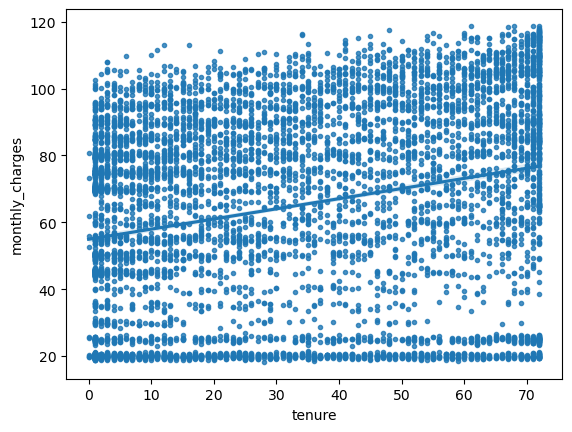

In [369]:
sns.regplot(data=telco,x='tenure',y='monthly_charges',marker='.')

In [363]:
t,p=stats.levene(telco.monthly_charges,telco.tenure)
t,p

(284.1713433605961, 3.8478737370242204e-63)

In [358]:
#2a.
t,p=stats.pearsonr(telco.monthly_charges,telco.tenure)
t,p

(0.24789985628615005, 4.0940449915016345e-99)

In [365]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

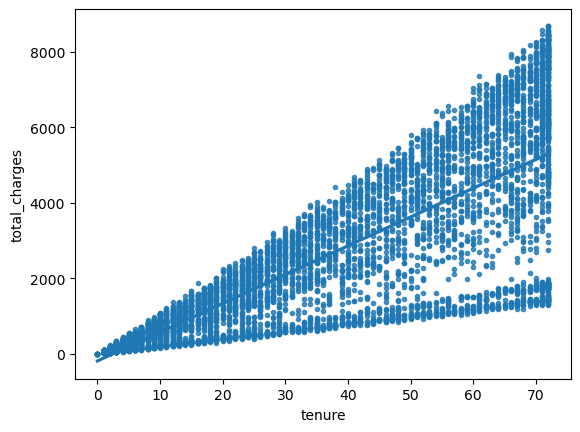

In [370]:
#2b.
sns.regplot(data=telco,x='tenure',y='total_charges',marker='.')

In [377]:
#2b.
sr,sp=stats.spearmanr(telco.total_charges,telco.tenure)
sr,sp

(0.8896957900597576, 0.0)

In [379]:
r,p=stats.pearsonr(telco.total_charges,telco.tenure)
r,p

(0.826178397950242, 0.0)

In [378]:
if sp < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [381]:
telco_services= pd.read_sql('''select customer_id, monthly_charges, convert(total_charges,decimal(7,2)) as total_charges,
tenure
FROM telco_churn.customers
where phone_service='Yes' and internet_service_type_id in ('1','2')

''',url)

In [382]:
telco_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      4835 non-null   object 
 1   monthly_charges  4835 non-null   float64
 2   total_charges    4835 non-null   float64
 3   tenure           4835 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 151.2+ KB


In [385]:
sr,sp=stats.spearmanr(telco_services.monthly_charges,telco_services.tenure)
sr,sp

(0.4453229857671336, 2.7481748958773124e-234)

In [386]:
if sp < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [387]:
t,p=stats.spearmanr(telco_services.total_charges,telco_services.tenure)
t,p

(0.9746954303655543, 0.0)

In [388]:
if sp < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


3. Use the employees database.

a. Is there a relationship between how long an employee has been with the company and their salary?

b.Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [389]:
query=pd.read_sql('''SELECT s.emp_no,s.salary,count(t.title) as amount_title ,s.from_date, s.to_date,
Datediff(curdate(),s.from_date) as tenure
 FROM employees.salaries as s
left join employees.titles as t using (emp_no)
 where s.to_date > curdate() 
 group by s.emp_no,s.salary, s.from_date, s.to_date
''',url)

query.head()

,emp_no,salary,amount_title,from_date,to_date,tenure
0,10001,88958,1,2002-06-22,9999-01-01,7598
1,10002,72527,1,2001-08-02,9999-01-01,7922
2,10003,43311,1,2001-12-01,9999-01-01,7801
3,10004,74057,2,2001-11-27,9999-01-01,7805
4,10005,94692,2,2001-09-09,9999-01-01,7884


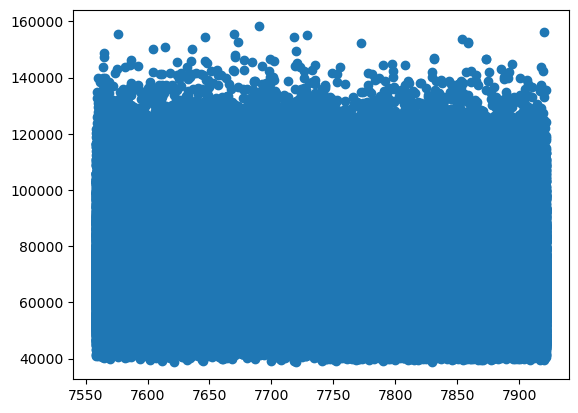

In [391]:
plt.scatter(query.tenure,query.salary)
plt.show()

In [393]:
#3a
sr,sp=stats.spearmanr(query.tenure,query.salary)
sr,sp

(-0.051148611931195756, 8.14728490436983e-139)

In [394]:
if sp < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


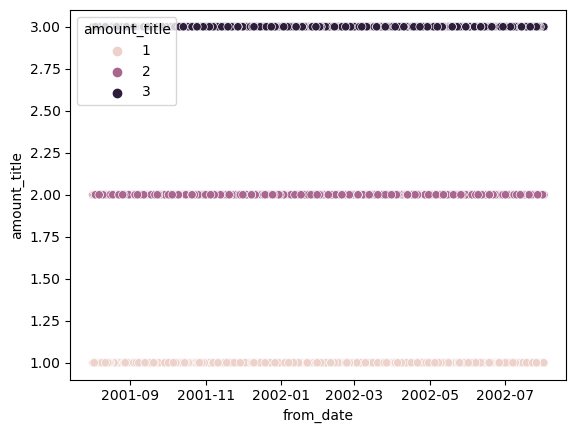

In [408]:
sns.scatterplot(data=query,y='amount_title',x='from_date',hue='amount_title')
plt.show()

In [402]:

r,p=stats.pearsonr(query.tenure,query.amount_title)
r,p

(-0.04176483338701352, 3.6258231489914853e-93)

In [403]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [409]:
#3b
sr,sp=stats.spearmanr(query.amount_title,query.tenure)
sr,sp

(-0.041921632092578466, 7.453931267557701e-94)

In [411]:
if sp < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [414]:
kr, kp= stats.kruskal(query.tenure,query.amount_title)
kr,kp

(371489.00594142586, 0.0)

In [415]:
if kp < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


4. Use the sleepstudy data.

Is there a relationship between days and reaction time?

In [326]:
df=data('sleepstudy')
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


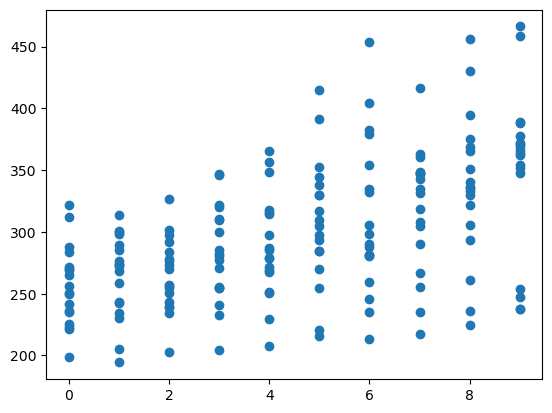

In [418]:
plt.scatter(df.Days,df.Reaction)

In [423]:
t,p=stats.pearsonr(df.Reaction,df.Days)
t,p

(0.5352302262650253, 9.894096322214812e-15)

In [424]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [425]:
sr,sp=stats.spearmanr(df.Days,df.Reaction)
sr,sp

(0.5228138502259547, 5.132878057706873e-14)

In [426]:
if sp < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


The Chi-Square Contingency

1. Answer with the type of stats test you would use (assume normal distribution):

a.Do students get better test grades if they have a rubber duck on their desk?

-

b. Does smoking affect when or not someone has lung cancer?

c. Is gender independent of a person’s blood type?

d. A farming company wants to know if a new fertilizer has improved crop yield or not

e.Does the length of time of the lecture correlate with a students grade?

f. Do people with dogs live in apartments more than people with cats?

2. Use the following contingency table to help answer the question of whether 
   using a macbook and being a codeup student are independent of each other.
   
a. They are dependent of each other

3. Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

𝐻0
 : There is no association between manufacturer and class.

𝐻𝑎
 : There IS an association between manufacturer and class.

In [429]:
#Is there a relationship between manufacturer type and class of cars?

mpg=data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [430]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [433]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [434]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [437]:
observed=pd.crosstab(mpg.manufacturer,mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


In [439]:
chi2,p,degf,expected=stats.chi2_contingency(observed)

In [440]:
print('observed')
print(observed.values)
print('\nexpected')
print(expected.astype(int))
print('\n------')
print(f'chi^2={chi2:.4f}')
print(f'p={p:.4f}')

observed
[[ 0 15  3  0  0  0  0]
 [ 5  0  5  0  0  0  9]
 [ 0  0  0 11 19  0  7]
 [ 0  0  0  0  7  9  9]
 [ 0  0  0  0  0  9  0]
 [ 0  0  7  0  0  7  0]
 [ 0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  4]
 [ 0  2  7  0  0  0  4]
 [ 0  0  5  0  0  0  0]
 [ 0  4  0  0  0  4  6]
 [ 0 12  7  0  7  0  8]
 [ 0 14  7  0  0  6  0]]

expected
[[0 3 3 0 2 2 4]
 [0 3 3 0 2 2 5]
 [0 7 6 1 5 5 9]
 [0 5 4 1 3 3 6]
 [0 1 1 0 1 1 2]
 [0 2 2 0 1 2 3]
 [0 1 1 0 1 1 2]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 2 2 0 1 1 3]
 [0 1 0 0 0 0 1]
 [0 2 2 0 1 2 3]
 [0 6 5 1 4 5 9]
 [0 5 4 1 3 4 7]]

------
chi^2=464.3721
p=0.0000


In [443]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


4. Use the data from the employees database to answer these questions:

a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

b. Is an employee's gender independent of whether or not they are or have been a manager?

In [444]:
import env

In [446]:
url=get_db_url('employees')

𝐻0 : There is no association between current employee gender and dept categories:Sales and Marketing.

𝐻𝑎 : There IS an association between current employee gender and dept categories:Sales and Marketing.

In [455]:
df=pd.read_sql('''SELECT t.emp_no,d.dept_name,salary,s.from_date, s.to_date, emp.gender
 FROM employees.salaries as s
left join employees.employees as emp using (emp_no)
left join employees.titles as t using (emp_no)
left join employees.dept_emp using (emp_no)
left join employees.departments as d using (dept_no)
 where s.to_date > curdate() and t.to_date > curdate()
and d.dept_name in ('Sales','Marketing')
 ''',url)
df.head()

,emp_no,dept_name,salary,from_date,to_date,gender
0,10017,Marketing,99651,2002-08-01,9999-01-01,F
1,10058,Marketing,72542,2002-04-22,9999-01-01,M
2,10140,Marketing,76604,2002-03-11,9999-01-01,F
3,10228,Marketing,96062,2001-12-20,9999-01-01,F
4,10239,Marketing,82905,2002-05-03,9999-01-01,F


In [458]:
observed=pd.crosstab(df.gender,df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,6429,16698
M,9823,25302


In [460]:
chi2,p,degf,expected=stats.chi2_contingency(observed)

In [464]:
#4a
print('observed')
print(observed.values)
print('\nexpected')
print(expected.astype(int))
print('\n------')
print(f'chi^2={chi2:.4f}')
print(f'p={p:.4f}')

observed
[[ 6429 16698]
 [ 9823 25302]]

expected
[[ 6452 16674]
 [ 9799 25325]]

------
chi^2=0.1855
p=0.6667


In [465]:
#4a
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


#4b

𝐻0 : There is no association between employee gender and manager position.

𝐻𝑎 : There IS an association between current employee gender and manager position.

In [474]:
manager=pd.read_sql('''SELECT t.emp_no, t.title,emp.gender,mang.from_date, mang.to_date
FROM employees.dept_manager as mang
left join employees.employees as emp using (emp_no)
left join employees.titles as t using (emp_no)
where t.title in ('Manager')
''',url)
manager.head()

,emp_no,title,gender,from_date,to_date
0,110022,Manager,M,1985-01-01,1991-10-01
1,110039,Manager,M,1991-10-01,9999-01-01
2,110085,Manager,M,1985-01-01,1989-12-17
3,110114,Manager,F,1989-12-17,9999-01-01
4,110183,Manager,F,1985-01-01,1992-03-21


In [477]:
observed=pd.crosstab(manager.gender,manager.title)
observed

title,Manager
gender,
F,13
M,11


In [481]:
chi2,p,degf,expected=stats.chi2_contingency(observed)

In [480]:
#4b
print('observed')
print(observed.values)
print('\nexpected')
print(expected.astype(int))
print('\n------')
print(f'chi^2={chi2:.4f}')
print(f'p={p:.4f}')

observed
[[13]
 [11]]

expected
[[13]
 [11]]

------
chi^2=0.0000
p=1.0000


In [483]:
#4b
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis
